In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from imblearn.datasets import fetch_datasets

In [3]:
mammography = fetch_datasets()['mammography']

In [4]:
mammography

{'data': array([[ 0.23001961,  5.0725783 , -0.27606055,  0.83244412, -0.37786573,
          0.4803223 ],
        [ 0.15549112, -0.16939038,  0.67065219, -0.85955255, -0.37786573,
         -0.94572324],
        [-0.78441482, -0.44365372,  5.6747053 , -0.85955255, -0.37786573,
         -0.94572324],
        ...,
        [ 1.2049878 ,  1.7637238 , -0.50146835,  1.5624078 ,  6.4890725 ,
          0.93129397],
        [ 0.73664398, -0.22247361, -0.05065276,  1.5096647 ,  0.53926914,
          1.3152293 ],
        [ 0.17700275, -0.19150839, -0.50146835,  1.5788636 ,  7.750705  ,
          1.5559507 ]]),
 'target': array([-1, -1, -1, ...,  1,  1,  1]),
 'DESCR': 'mammography'}

In [5]:
X = pd.DataFrame(mammography['data'])

In [6]:
Y = pd.DataFrame(mammography['target'])

In [7]:
X.shape

(11183, 6)

In [8]:
Y.shape

(11183, 1)

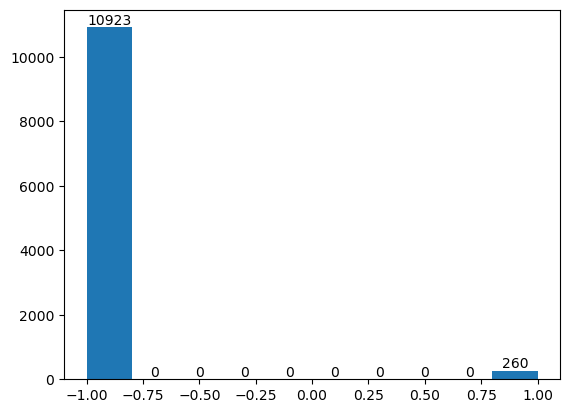

In [9]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [10]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096535e-10,1.297595e-09,5.698113e-10,-2.435705e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [13]:
from imblearn.metrics import classification_report_imbalanced

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
def report(model, x, y, text='training'):
    y_pred = model.predict(x)
    
    print(f'{text}:\tClassification report for model: {type(model).__name__}')
    print('-'*80)
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print('-'*80)
    print(pd.DataFrame(confusion_matrix(y, y_pred), index=['B', 'M'], columns=['B', 'M']))

In [16]:
# klasican nacin:

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model_dct = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [19]:
model_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [20]:
report(model_dct, X_train, y_train)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

--------------------------------------------------------------------------------
      B    M
B  8170   22
M    72  123


In [21]:
report(model_dct, X_test, y_test, 'testing')

testing:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

--------------------------------------------------------------------------------
      B   M
B  2718  13
M    31  34


In [22]:
def resample(sampler, X, Y):
    X_resampled, Y_resampled = sampler.fit_resample(X, Y)
    
    return X_resampled, Y_resampled

In [23]:
from sklearn.decomposition import PCA

In [24]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled)
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, Y_resampled]
    
    fig = plt.figure(figsize=(20,5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:,0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title(f'{"After" if i else "Before"}', c='blue' if i else 'green')
    plt.show()

In [25]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    model.fit(X_train, Y_train)
    report(model, X_train, Y_train)
    print('\n')
    report(model, X_test, Y_test)
    return model

In [26]:
# RandomOverSampler

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [29]:
X_res, y_res = resample(ros, X_train, y_train)

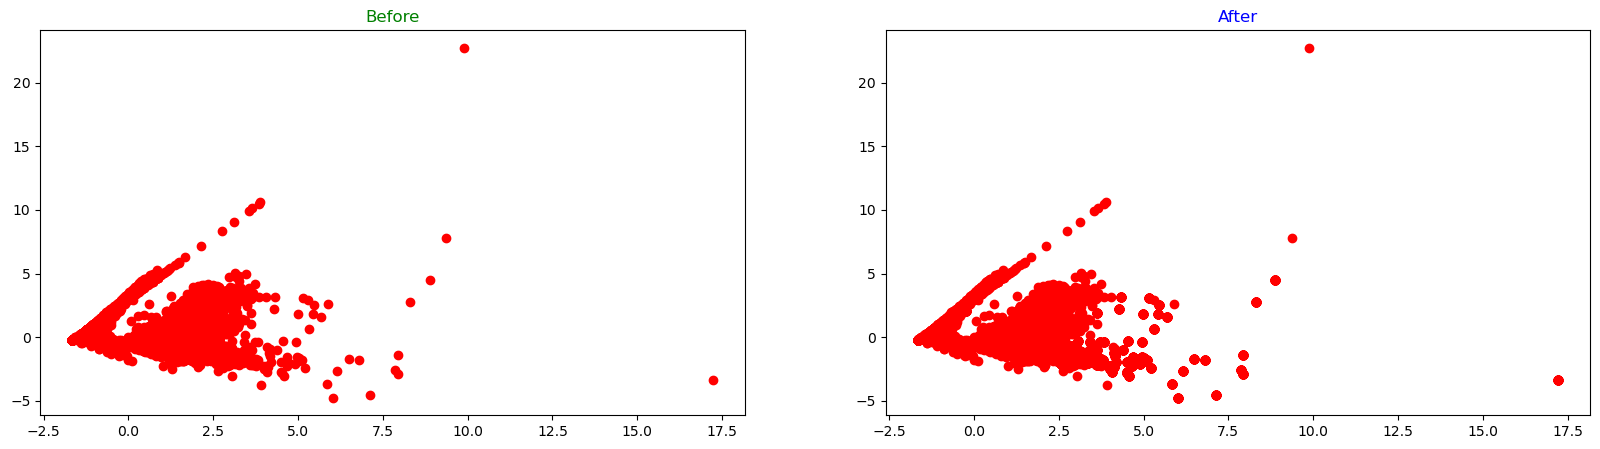

In [30]:
visualize(X_train, X_res, y_train, y_res, 0)

In [31]:
model_ros = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.96      0.93      0.95      0.95      0.90      8192
          1       0.96      0.93      0.96      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.89     16384

--------------------------------------------------------------------------------
      B     M
B  7903   289
M   593  7599


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.71      0.98      0.83      0.70      2731
          1       0.34      0.71      0.97      0.46      0.83      0.67       

In [32]:
# SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(k_neighbors=19, random_state=42)

In [35]:
X_res, y_res = resample(smote, X_train, y_train)

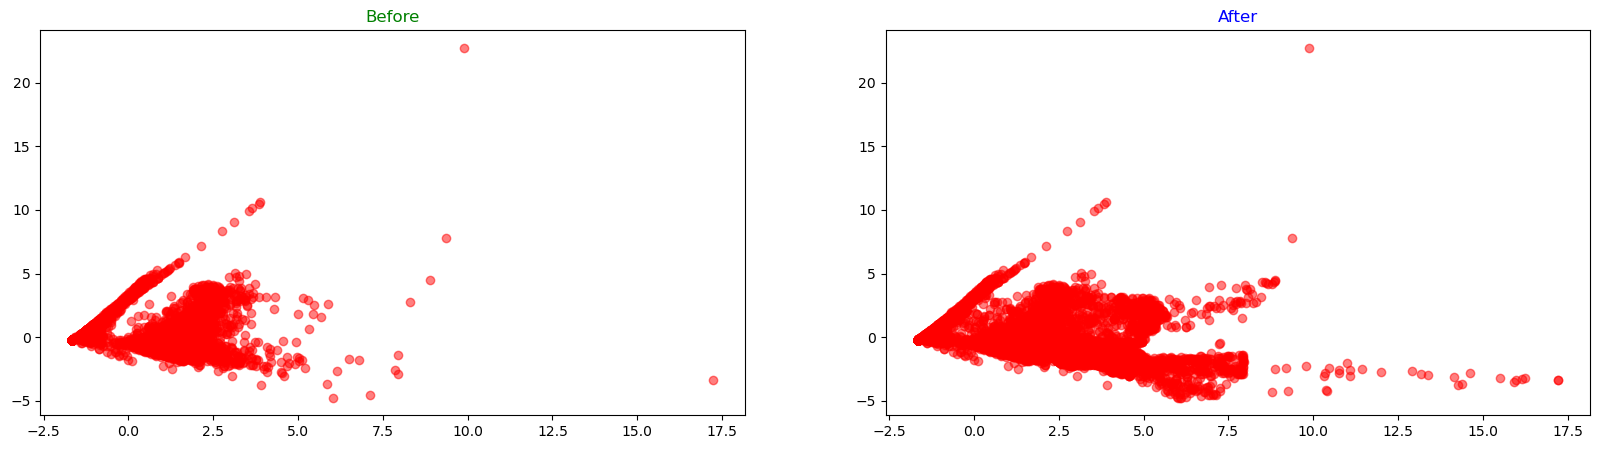

In [36]:
visualize(X_train, X_res, y_train, y_res)

In [37]:
model_smote = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.94      0.95      0.95      0.90      8192
          1       0.95      0.94      0.96      0.95      0.95      0.90      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.90     16384

--------------------------------------------------------------------------------
      B     M
B  7827   365
M   453  7739


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.95      0.75      0.97      0.84      0.73      2731
          1       0.25      0.75      0.95      0.38      0.84      0.70       

In [38]:
# Undersampling
# RandomUnderSampler

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomOverSampler()

In [41]:
X_res, y_res = resample(rus, X_train, y_train)

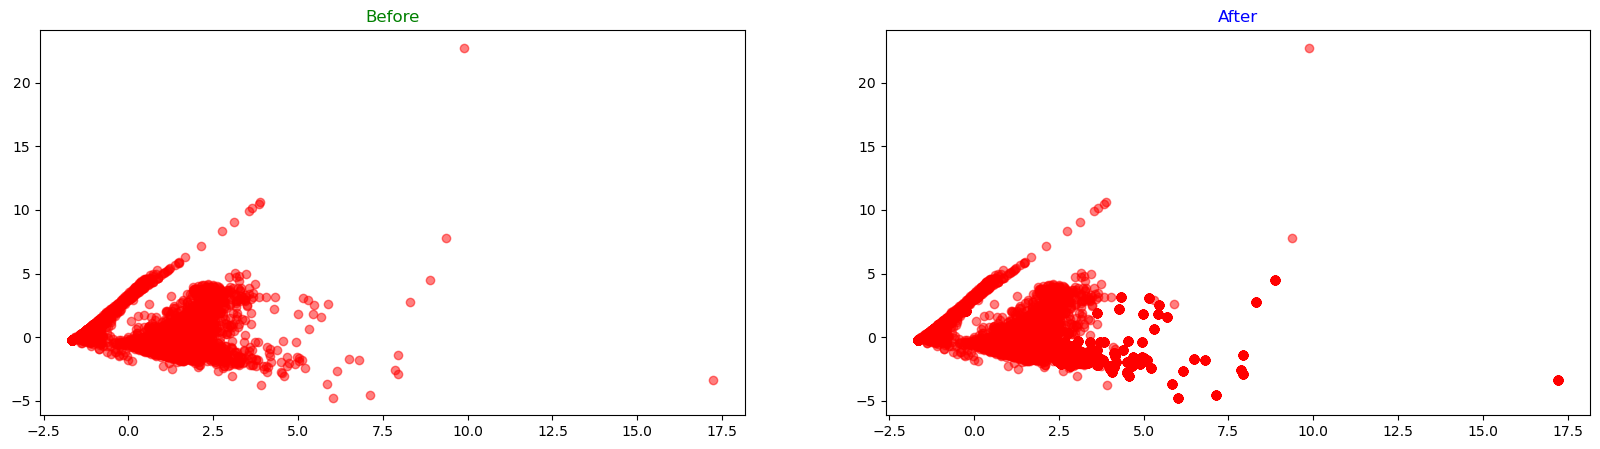

In [42]:
visualize(X_train, X_res, y_train, y_res)

In [43]:
model_rus = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.94      0.97      0.94      0.95      0.95      0.91      8192
          1       0.97      0.94      0.97      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

--------------------------------------------------------------------------------
      B     M
B  7933   259
M   501  7691


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.74      0.98      0.85      0.73      2731
          1       0.35      0.74      0.97      0.48      0.85      0.70       

In [44]:
# NearMiss 1 2 3

In [45]:
from imblearn.under_sampling import NearMiss

In [46]:
mn1 = NearMiss(version=1, n_neighbors=20)

In [47]:
X_res, y_res = resample(mn1, X_train, y_train)

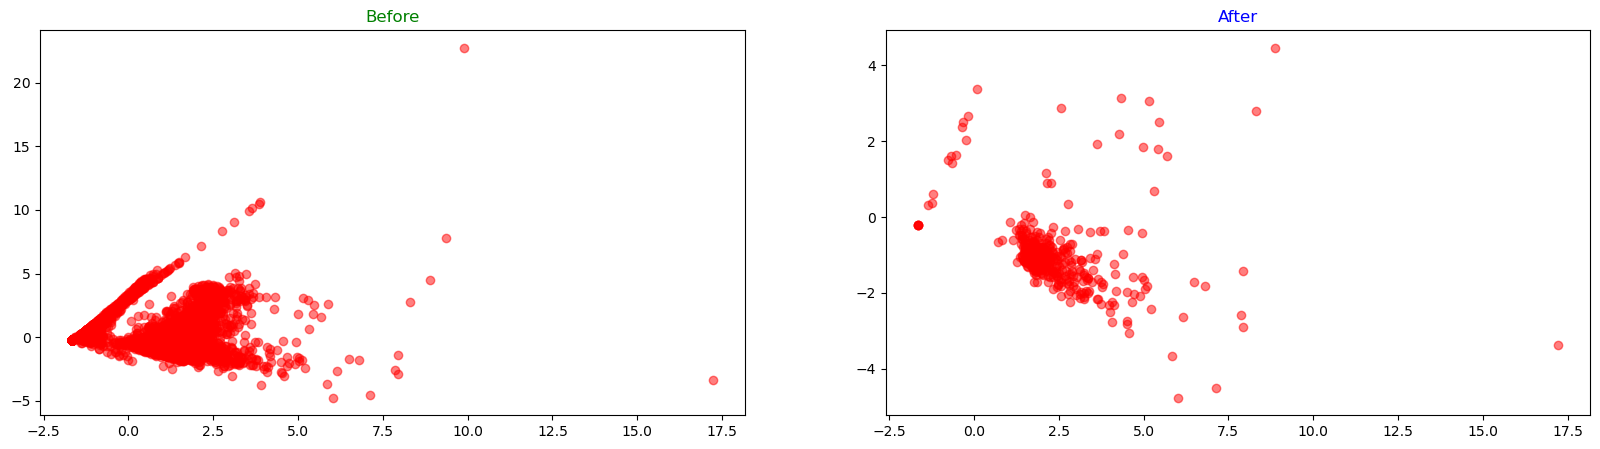

In [48]:
visualize(X_train, X_res, y_train, y_res)

In [49]:
model_nm1 = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.84      0.96      0.82      0.90      0.89      0.80       195
          1       0.96      0.82      0.96      0.88      0.89      0.78       195

avg / total       0.90      0.89      0.89      0.89      0.89      0.79       390

--------------------------------------------------------------------------------
     B    M
B  188    7
M   35  160


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.13      0.72      0.23      0.30      0.09      2731
          1       0.02      0.72      0.13      0.04      0.30      0.10        65

a

In [50]:
nm2 = NearMiss(version=2, n_neighbors=20)

In [51]:
X_res, y_res = resample(nm2, X_train, y_train)

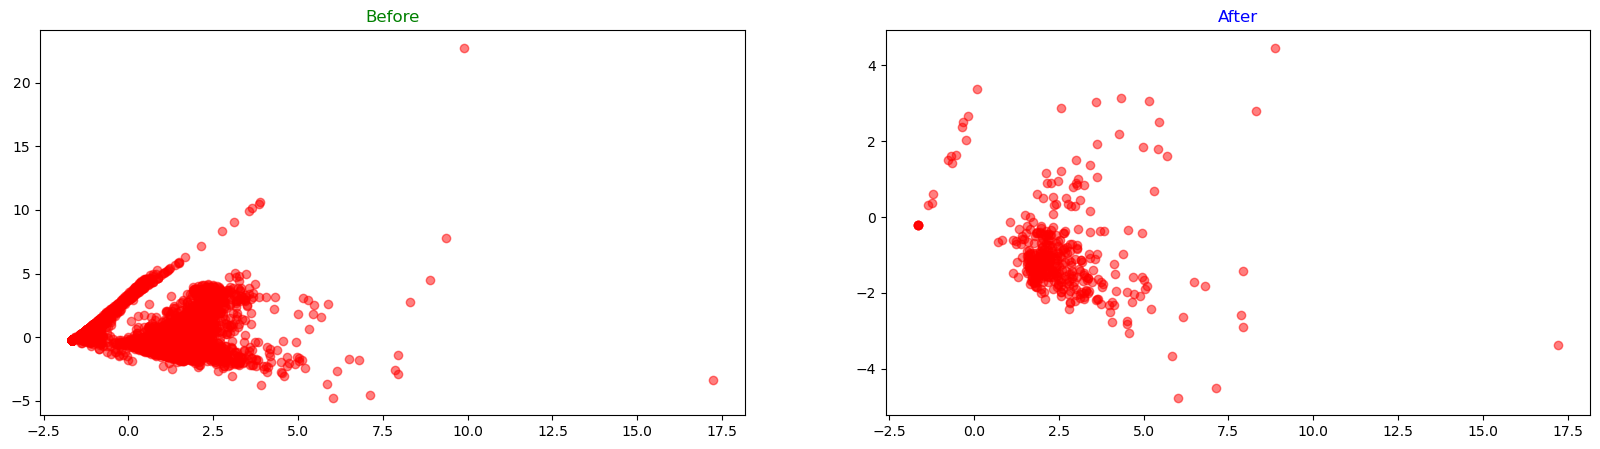

In [53]:
visualize(X_train, X_res, y_train, y_res)

In [54]:
model_nm2 = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90       195
          1       0.97      0.93      0.97      0.95      0.95      0.90       195

avg / total       0.95      0.95      0.95      0.95      0.95      0.90       390

--------------------------------------------------------------------------------
     B    M
B  189    6
M   14  181


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.03      0.89      0.07      0.17      0.03      2731
          1       0.02      0.89      0.03      0.04      0.17      0.03        65

a

In [55]:
nm3 = NearMiss(version=3, n_neighbors=20)

In [56]:
X_res, y_res = resample(nm3, X_train, y_train)

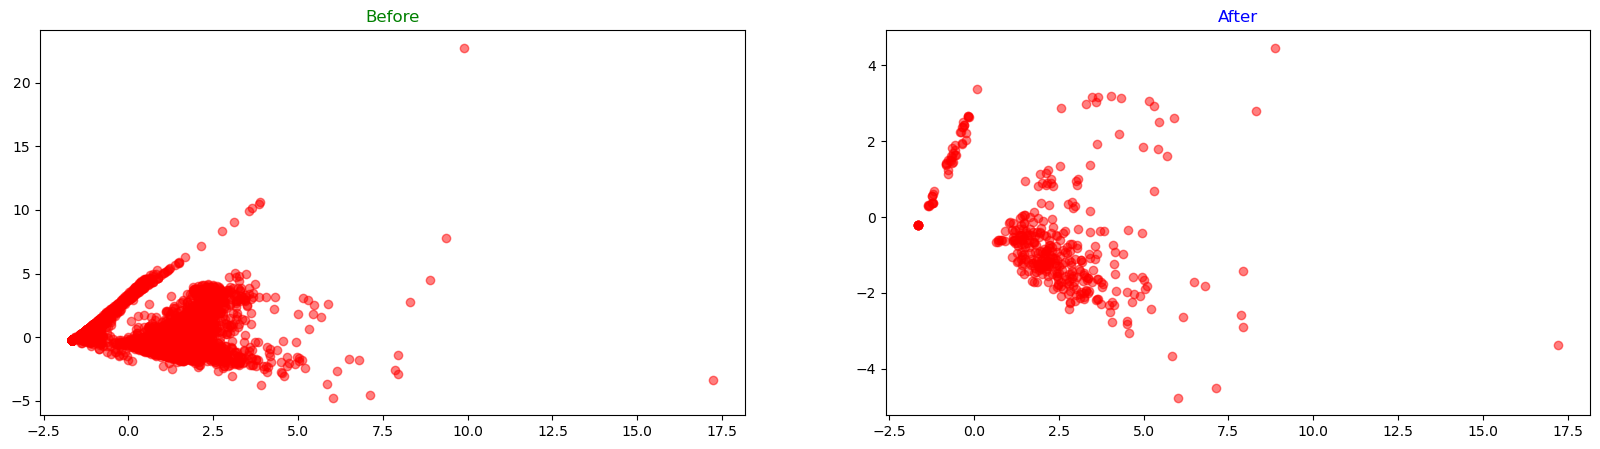

In [57]:
visualize(X_train, X_res, y_train, y_res)

In [58]:
model_nm3 = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.78      0.94      0.73      0.85      0.83      0.70       195
          1       0.92      0.73      0.94      0.81      0.83      0.67       195

avg / total       0.85      0.83      0.83      0.83      0.83      0.68       390

--------------------------------------------------------------------------------
     B    M
B  183   12
M   53  142


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.59      0.62      0.74      0.60      0.36      2731
          1       0.03      0.62      0.59      0.07      0.60      0.36        65

a

In [59]:
# CondenseNearestNeighbour

In [60]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [61]:
cnn = CondensedNearestNeighbour(random_state=0, n_neighbors=10, sampling_strategy='majority')


In [62]:
X_res, y_res = resample(cnn, X_train, y_train)

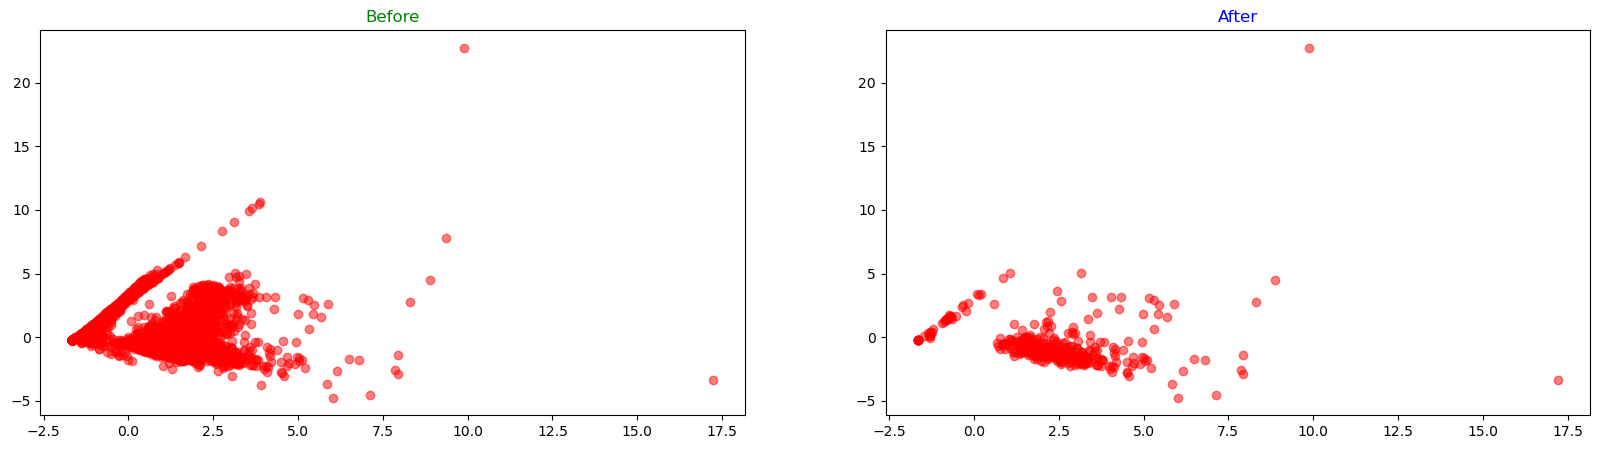

In [63]:
visualize(X_train, X_res, y_train, y_res)

In [64]:
model_cnn = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.83      0.79      0.84      0.81      0.81      0.66       192
          1       0.80      0.84      0.79      0.82      0.81      0.66       195

avg / total       0.81      0.81      0.81      0.81      0.81      0.66       387

--------------------------------------------------------------------------------
     B    M
B  152   40
M   32  163


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.54      0.66      0.70      0.60      0.35      2731
          1       0.03      0.66      0.54      0.06      0.60      0.36        65

a

In [65]:
# SMOTEENN

In [66]:
from imblearn.combine import SMOTEENN

In [67]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy='auto')

In [68]:
X_res, y_res = resample(smoteenn, X_train, y_train)

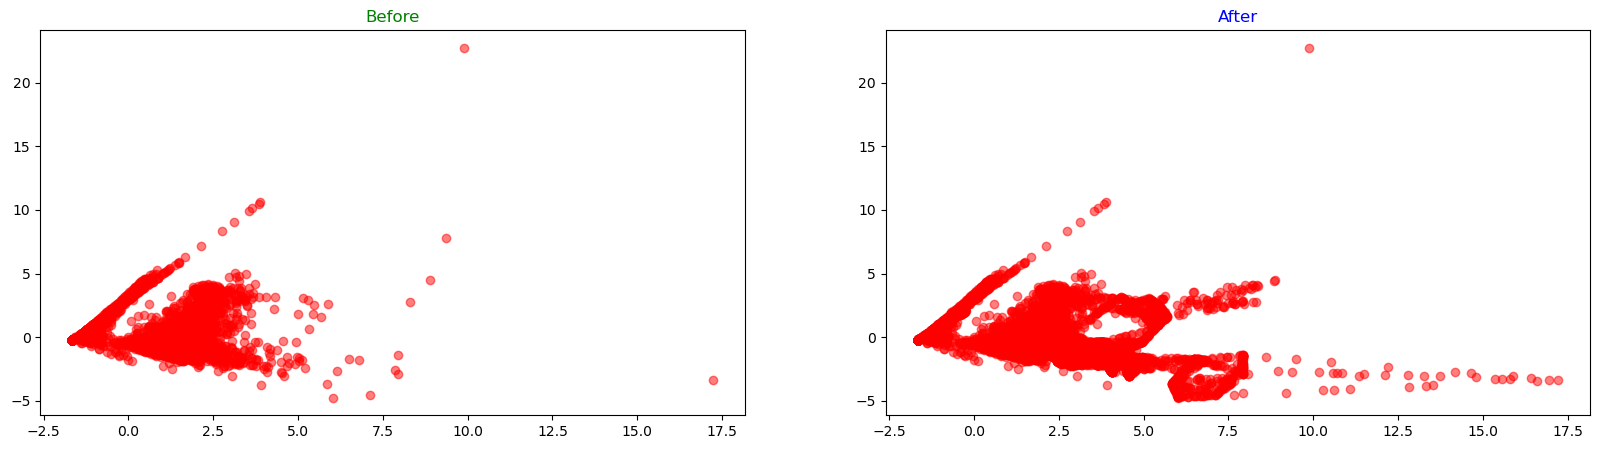

In [69]:
visualize(X_train, X_res, y_train, y_res)

In [70]:
model_smoteenn = train_and_evaluate(X_res, y_res, X_test, y_test)

training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.98      0.98      0.98      0.98      0.96      7760
          1       0.98      0.98      0.98      0.98      0.98      0.96      7882

avg / total       0.98      0.98      0.98      0.98      0.98      0.96     15642

--------------------------------------------------------------------------------
      B     M
B  7634   126
M   159  7723


training:	Classification report for model: DecisionTreeClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.97      0.85      0.74      2731
          1       0.29      0.75      0.96      0.42      0.85      0.71       

In [71]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [72]:
model_ens = BalancedRandomForestClassifier(max_depth=6, random_state=42, max_samples=20)

In [73]:
model_ens.fit(X_train, y_train)

/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

BalancedRandomForestClassifier(max_depth=6, max_samples=20, random_state=42)

In [74]:
report(model_ens, X_train, y_train)

training:	Classification report for model: BalancedRandomForestClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.90      0.87      0.95      0.88      0.78      8192
          1       0.17      0.87      0.90      0.29      0.88      0.78       195

avg / total       0.98      0.90      0.87      0.93      0.88      0.78      8387

--------------------------------------------------------------------------------
      B    M
B  7374  818
M    26  169


In [75]:
report(model_ens, X_test, y_test, 'testing')

testing:	Classification report for model: BalancedRandomForestClassifier
--------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.91      0.83      0.95      0.87      0.76      2731
          1       0.17      0.83      0.91      0.29      0.87      0.75        65

avg / total       0.98      0.90      0.83      0.93      0.87      0.76      2796

--------------------------------------------------------------------------------
      B    M
B  2473  258
M    11   54


In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

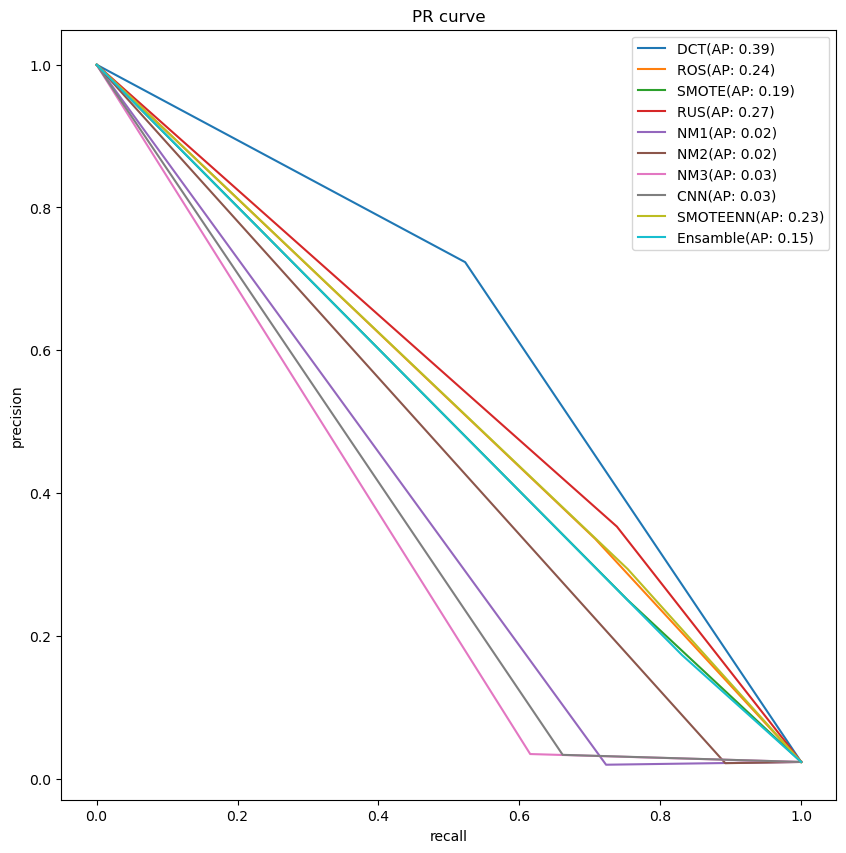

In [79]:
models = [model_dct, model_ros, model_smote, model_rus, model_nm1, model_nm2, model_nm3, model_cnn, model_smoteenn, model_ens]
model_names = ['DCT', 'ROS', 'SMOTE', 'RUS', 'NM1', 'NM2', 'NM3', 'CNN', 'SMOTEENN', 'Ensamble']

plt.figure(figsize=(10, 10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)
    lab = model_name + "(AP: " + str(round(ap, 2)) + ")"
    plt.plot(recall, precision, label=lab)
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

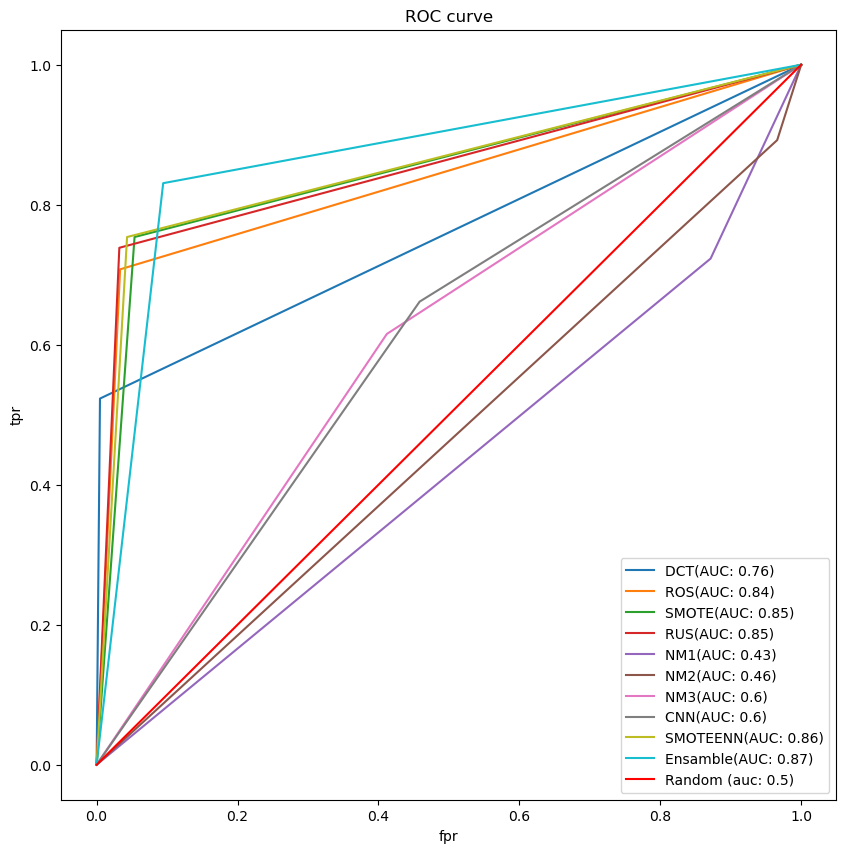

In [82]:
plt.figure(figsize=(10,10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)
    
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.legend()
plt.title('ROC curve')
plt.show()